<a href="https://colab.research.google.com/github/annhater/isdd_projects/blob/main/ai_2/MNIST_Fashion_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mise à la main**
Utilisation de réseaux DNN avec keras

*   obtenir un bon accuracy
*   minumum des parametres
*   commenter le code (pour les param qu'on a changé)



In [ ]:
#
# MNIST Fashion by Convolution network
#
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import save_img, load_img, img_to_array


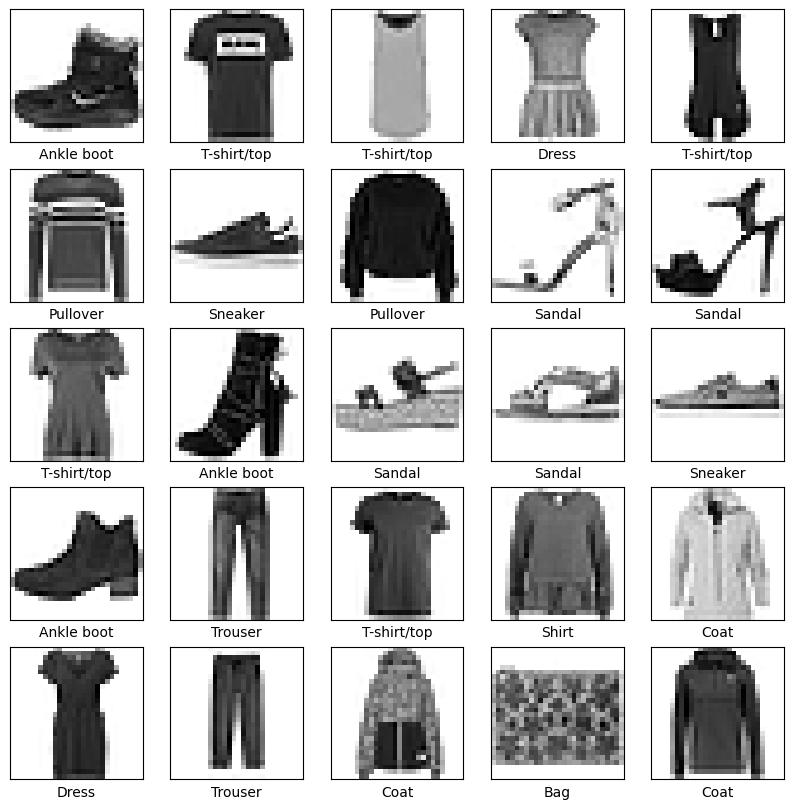

In [ ]:
# load the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#
# plot first 25 images
#
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

#plt.savefig("fashion.png", format="png")
plt.show()


In [ ]:
#
# pre-formatting of the images
#
train_images = train_images.astype('float32') #si couleur plusieur canaux (RGB trouis canaux)
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0
# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) #transforment les dimensions d'objets (reshape the given tensor into a given shape)
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# One hot encoding the target labels
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes) #transf en matrice indicater de label
test_labels = keras.utils.to_categorical(test_labels, num_classes)
# shuffle the data
ns =  train_images.shape[0] #number of examples
shuffle_index = np.random.permutation(ns) #mixes/shuffles the data
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]


Topologie du reseau À GARDER!


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(16, (3, 3), padding = "same", activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), padding = "same", activation='relu', kernel_initializer='he_uniform'))
#16 filtres, taille de filtre = (3,3) => n de param = 16 * 9 => 16 image produits
#reduit la taille d'image par 2 => 26/2 = 13*13
model.add(MaxPooling2D((2, 2)))
#pooling de 2*2 pour reduire la taille d'image par 4
model.add(Flatten())#mettre à plat, un seul vecteur
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,930 (109.10 KB)

 Trainable params: 27,930 (109.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#
# compile and fit the model
#
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#sparce categorical cross-entropy => s'en sort sans les
#adam marche sur la base du stochastic gradient
#batch size à changer si nécessaire
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=100)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.6643 - loss: 0.9250 - val_accuracy: 0.8479 - val_loss: 0.4276
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.8417 - loss: 0.4525 - val_accuracy: 0.8661 - val_loss: 0.3567
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.8633 - loss: 0.3876 - val_accuracy: 0.8733 - val_loss: 0.3443
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8734 - loss: 0.3566 - val_accuracy: 0.8840 - val_loss: 0.3135
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8785 - loss: 0.3345 - val_accuracy: 0.8856 - val_loss: 0.3039
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8845 - loss: 0.3171 - val_accuracy: 0.8847 - val_loss: 0.3079
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.8896 - loss: 0.3021 - val_accuracy: 0.8908 - val_loss: 0.2970
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.8950 - loss: 0.2955 - 

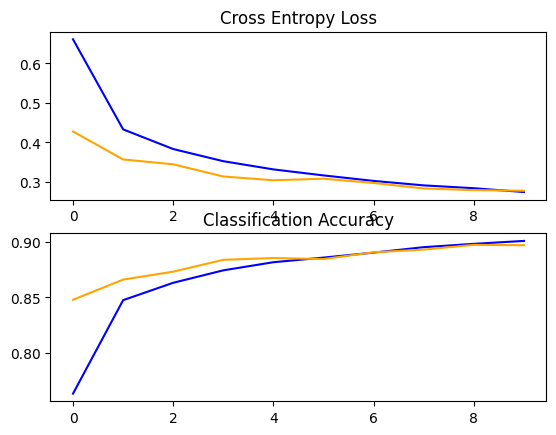

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()


In [ ]:
#
# evaluate the model
#
scores = model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8975 - loss: 0.2795
Neural network accuracy: 89.72%


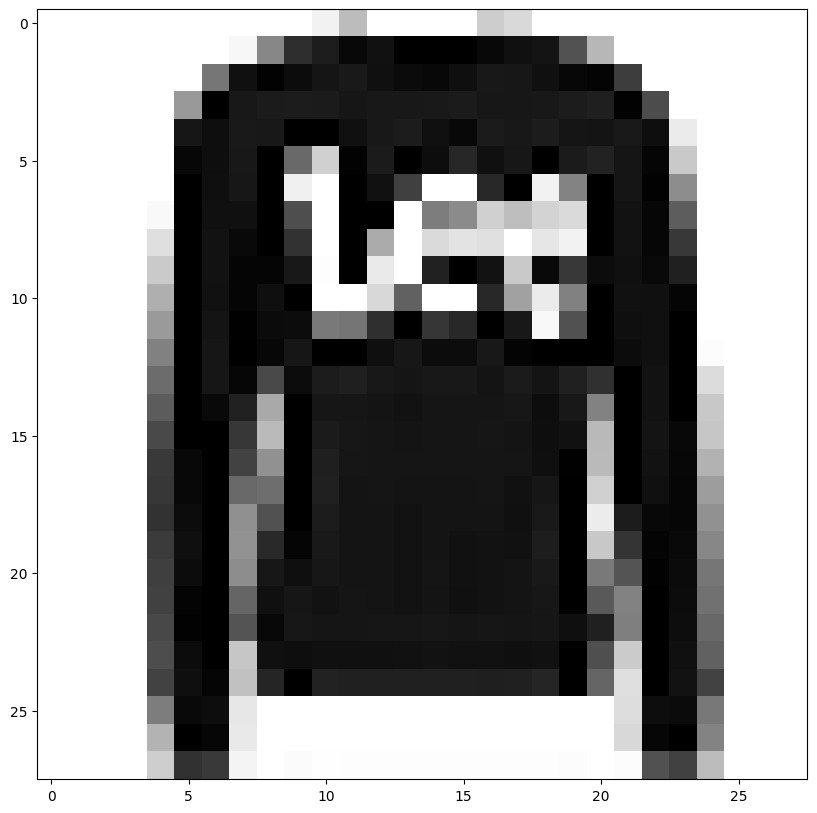

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
class= [2]


In [ ]:
#
# Inference
#
img = test_images[1]
plimage = img*255
plimage = plimage.astype("uint8")
plimage = plimage.reshape(28,28,1)

plt.figure(figsize=[10,10])
plt.imshow(plimage, cmap=plt.cm.binary)
plt.show()

img = img.reshape((1,28,28,1))
result = model.predict(img, batch_size=1)
print("class=", np.argmax(result,1))
